In [0]:
!pip3 install torch

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


Text(0.5, 0, 'x')

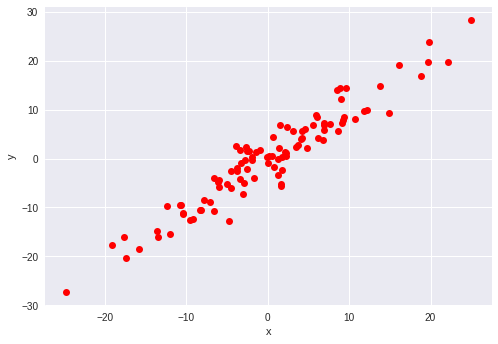

In [0]:
X = torch.randn(100, 1) * 10
y = X + torch.randn(100, 1) * 3
plt.plot(X.numpy(), y.numpy(), "ro")
plt.ylabel('y')
plt.xlabel('x')

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
    
  def forward(self, x):
    pred = self.linear(x)
    return pred
  
    

In [0]:
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [0]:
[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-10, 10])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

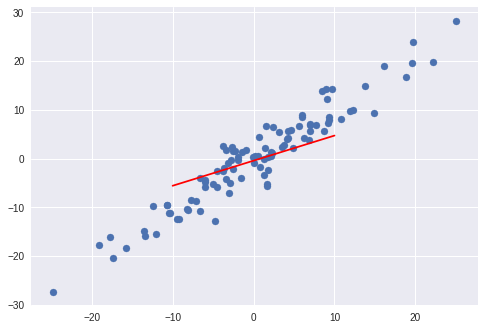

In [0]:
plot_fit('Initial Model')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [0]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print('epoch:', i, "loss:", loss.item())
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 30.594865798950195
epoch: 1 loss: 18.391218185424805
epoch: 2 loss: 12.914521217346191
epoch: 3 loss: 10.455592155456543
epoch: 4 loss: 9.350522994995117
epoch: 5 loss: 8.85287094116211
epoch: 6 loss: 8.627779960632324
epoch: 7 loss: 8.525032997131348
epoch: 8 loss: 8.477240562438965
epoch: 9 loss: 8.454166412353516
epoch: 10 loss: 8.442246437072754
epoch: 11 loss: 8.435391426086426
epoch: 12 loss: 8.430869102478027
epoch: 13 loss: 8.427450180053711
epoch: 14 loss: 8.424581527709961
epoch: 15 loss: 8.422011375427246
epoch: 16 loss: 8.41962718963623
epoch: 17 loss: 8.417373657226562
epoch: 18 loss: 8.415226936340332
epoch: 19 loss: 8.413171768188477
epoch: 20 loss: 8.411202430725098
epoch: 21 loss: 8.409311294555664
epoch: 22 loss: 8.407496452331543
epoch: 23 loss: 8.405754089355469
epoch: 24 loss: 8.40407943725586
epoch: 25 loss: 8.402471542358398
epoch: 26 loss: 8.40092658996582
epoch: 27 loss: 8.399443626403809
epoch: 28 loss: 8.398019790649414
epoch: 29 loss: 8.396651

Text(0.5, 0, 'epoch')

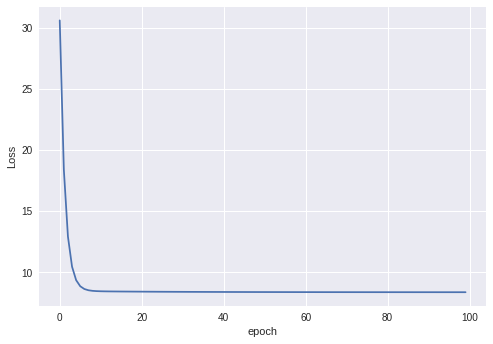

In [0]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

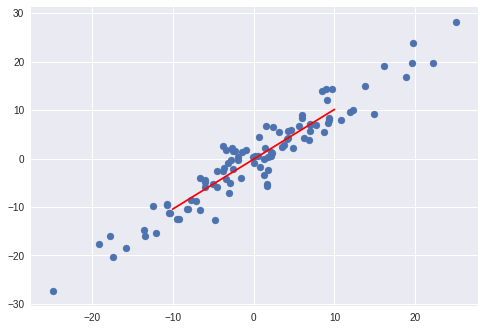

In [0]:
plot_fit("Trained Model")